# Python app for Werner states

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from numpy import pi
from myPackage.my_module import *

np.set_printoptions(precision=5,suppress=True)


pio4=density_matrix(rho2(pi/4,1), 'pio4')
pio2=density_matrix(rho2(pi/2,1), 'pio2')
pio3=density_matrix(rho2(pi/3,1), 'pio3')
pio6=density_matrix(rho2(pi/6,1), 'pio6')
pio5=density_matrix(rho2(pi/5,1), 'pio5')
pio1=density_matrix(rho2(pi,1), 'pio1')
pio4v05=density_matrix(rho2(pi/4,1/2))
pio2v05=density_matrix(rho2(pi/2,1/2))
pio3v05=density_matrix(rho2(pi/3,1/2))
pio6v05=density_matrix(rho2(pi/6,1/2))
pio5v05=density_matrix(rho2(pi/5,1/2))
noise=density_matrix(np.identity(4)/4)
rand_state=density_matrix([[0.27787, 0.14449, 0.2125 , 0.19819],
        [0.14449, 0.23208, 0.18863, 0.0477 ],
        [0.2125 , 0.18863, 0.31998, 0.12641],
        [0.19819, 0.0477 , 0.12641, 0.17006]], 'rand_state')

states = [pio1, pio2, pio3, pio4, pio5, pio6, rand_state]

for state in states:
        state.data = np.array(np.load('statesData/'+str(state)+'.npy'))

## Important functions

Basic class
**Density_matrix**
- to initiallize, pass 4x4 ndarray (density matrix)
- attributes
    - `data` - array of observation outcomes (real number [0,1] representing the probability of being found in 00 state after rotating by some random unitary matrix)
    - `matrix` - 4x4 ndarray density matrix 
- methods
    - `set(N=50000)` puts density matrix to N observations and saves the outcomes to `data` attribute
    - `range()` - returns minimum and maximum outcome
    - `histogram(BinNum=100)` - creates a histogram with `BinNum` bins
    - `bins(BinNum=100)` - creates a dictionary with `bins` representing boundaries of bins evenly spaced on [0,1] (with borders)
    - `curve` - plots a curve being a smoothered verion of the histogram

- rho2
- obs
- classical_fidelity
- matrix_fidelity
- Frobenius_dist
- vis_optimizer
- rand_PSDM
- mean_over_unitars



### Creating data for machine learning

In [1]:

learning_data=[]
learning_param=[]
learning_param2=[]
for i in range(1000):
    a1=random.random()
    alph1=random.random()*2-1
    alph2=random.random()*2-1
    vis1=random.random()
    vis2=random.random()
    state=density_matrix(a1*rho2(alph1,vis1)+(1-a1)*rho2(alph2,vis2))
    state.set(N=5000)
    learning_data.append(state.bins(BinNum=200)["counts"])
    learning_param.append([a1,(1-a1),alph1,alph2,vis1,vis2])
    learning_param2.append(state.matrix.flatten())
np.save("learning_data.npy",learning_data)
np.save("learning_param.npy",learning_param)
np.save("learning_param2.npy",learning_param2)
learning_data=[]
learning_param=[]
learning_param2=[]


NameError: name 'random' is not defined

### Review of histograms of Werner States with different angles and visibilities


In [ ]:
for i in range(6):
    for l in range(5):
        data=[]
        for j in range(10000):
            p=obs(rho2(pi/(i+1),(l+1)/5),parameters[j][0],parameters[j][1])
            data.append(p)
        plt.hist(data,range=(0,1),density=True);
        plt.title('pi'+str(i+1)+' vis='+str((l+1)/5));
        plt.savefig(f'diff_angles_and_vis\Werner_pi'+str(i+1)+'_'+str((l+1)/5)+'.png');
        plt.show();
    

In [ ]:
angles=np.linspace(0,2,20)
for i in angles:
    for l in range(6):
        data=[]
        for j in range(10000):
            p=obs(rho2(pi*i,(l+1)/1),parameters[j][0],parameters[j][1])
            data.append(p)
        plt.hist(data,range=(0,1))
        plt.title(str(i)+", vis="+str((l+1)/1))
        plt.savefig(f'Werner{i:.2f}.png')
        plt.show();


In [ ]:
for a in (item/5 - 1 for item in range(15)):
    data=[]
    err_count=0
    for j in range(1000):
        p=obs((a*rho2(pi/2,1)+(1-a)*rho2(pi/4,1)),parameters[j][0],parameters[j][1])
        if(p>1.0 or p<0.0):
            print("Error: p=" + str(p) + ", a=" + str(a) + ", parameters=[" + str(parameters[j][0])+ ', ' + str(parameters[j][1]))
            err_count+=1
        data.append(p)
    print('Num of errors = ' + str(err_count))
    plt.hist(data,range=(0,1),density=True)
    plt.title("a="+str(a))
    plt.savefig("Werner"+str(a)+".png")
    plt.show();

### Optimising visibility

[[0.22988 0.22514 0.23235 0.18269]
 [0.22514 0.3492  0.25675 0.20958]
 [0.23235 0.25675 0.26561 0.19865]
 [0.18269 0.20958 0.19865 0.15531]]
setting density_matrix data...
setting density_matrix data...
<class 'numpy.matrix'> <class 'numpy.matrix'>
Initial distance 0.8618964657523698
Initial classical fidelity: 0.9692387262088357
Initial quantum fidelity: 0.742059172930175
Optimal visibility: 0.9589849682784475
setting density_matrix data...
Final classical fidelity: 0.9741737224448284
Final quantum fidelity: 0.7797069969536949
<class 'numpy.matrix'> <class 'numpy.matrix'>
Final distance: 0.8409917550163897
Theoretically predicted distance: 0.6130910724933648


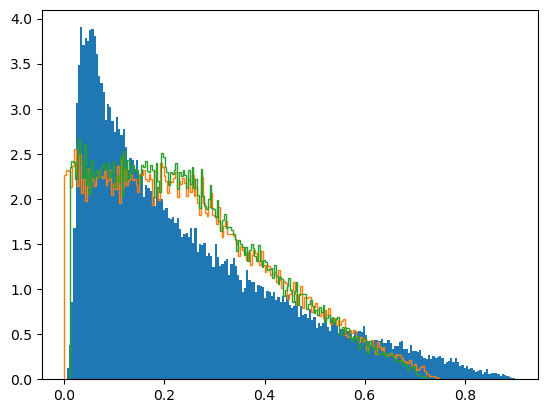

In [2]:

rand_state=density_matrix(rand_PSDM())
print(rand_state.matrix)
vis_optimizer_dm(rand_state, pio6,plot=True)


setting density_matrix data...
<class 'numpy.matrix'> <class 'numpy.matrix'>
Initial distance 0.3660254037844388
Initial classical fidelity: 0.9415201399619955
Initial quantum fidelity: 0.9659258262890684
Optimal visibility: 0.9220268532826605
setting density_matrix data...
Final classical fidelity: 0.9302821965289219
Final quantum fidelity: 0.9379531183794697
<class 'numpy.matrix'> <class 'numpy.matrix'>
Final distance: 0.35789388661333965
Theoretically predicted distance: 0.3449067640430059


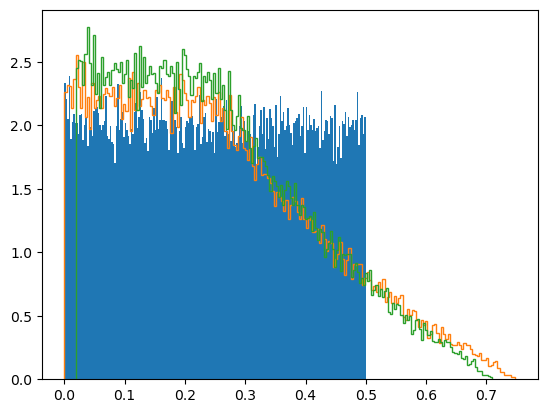

In [3]:
vis_optimizer_dm(pio4, pio6, plot=True)

Duża różnica między matrix_fidelity, a classical_fidelity. Przyczyna:

In [4]:
matrix_fidelity(pio1, pio2)

1.1248198369963933e-32

In [5]:
classical_fidelity(pio1, pio2)

setting density_matrix data...
setting density_matrix data...


0.9995383148575573

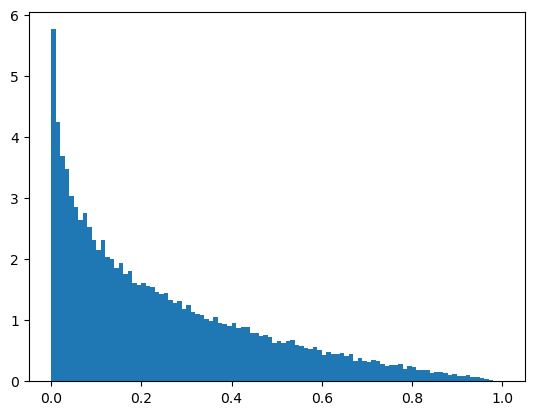

In [7]:
pio1.histogram()

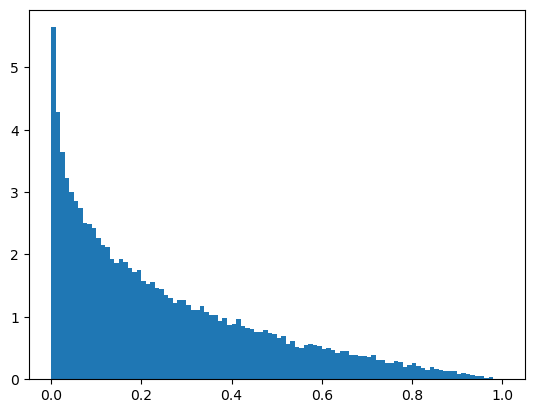

In [8]:
pio2.histogram()

Obrócenie macierzą unitarną nie zmienia histogramu

setting density_matrix data...


matrix([[0.22386, 0.20323, 0.14531, 0.20791],
        [0.20323, 0.29492, 0.20338, 0.27052],
        [0.14531, 0.20338, 0.15397, 0.20425],
        [0.20791, 0.27052, 0.20425, 0.32725]])

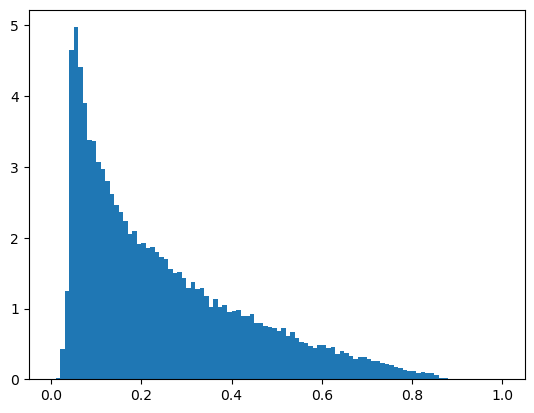

In [5]:
rand_state = density_matrix(rand_PSDM())
rand_state.histogram()
rand_state.matrix

In [3]:
rand_state=density_matrix(rand_PSDM())
rand_stateaT=rand_state.aT()
for state in states:
    print(state)
    qf1 = matrix_fidelity(state, rand_state)
    qf2 = matrix_fidelity(state, rand_stateaT)
    cf = classical_fidelity(state, rand_state)
    print(f'quantum fidelity: {qf1}')
    print(f'classical fidelity: {cf}')
    

pio1
setting density_matrix data...
setting density_matrix data...
quantum fidelity: 0.21905732992219504, aT: 0.31103597759577434
classical fidelity: 0.9716759326517799
pio2
setting density_matrix data...
quantum fidelity: 0.31103597759577434, aT: 0.21905732992219507
classical fidelity: 0.9719281529944859
pio3
setting density_matrix data...
quantum fidelity: 0.4795000310923273, aT: 0.43351070725553764
classical fidelity: 0.970933999246258
pio4
setting density_matrix data...
quantum fidelity: 0.486124135526025, aT: 0.486124135526025
classical fidelity: 0.9003240416260916
pio5
setting density_matrix data...
quantum fidelity: 0.46109235077427013, aT: 0.48951531602503184
classical fidelity: 0.9502395164458219
pio6
setting density_matrix data...
quantum fidelity: 0.4335107072555377, aT: 0.4795000310923273
classical fidelity: 0.9716721425178279


### Averaging over unitary matrices

Initial matrix:
[[0.27188 0.25746 0.16244 0.2267 ]
 [0.25746 0.31353 0.23129 0.2116 ]
 [0.16244 0.23129 0.18462 0.1261 ]
 [0.2267  0.2116  0.1261  0.22997]]
Final matrix:
[[ 0.25  0.    0.    0.  ]
 [ 0.    0.25  0.    0.  ]
 [ 0.    0.    0.25 -0.  ]
 [ 0.    0.   -0.    0.25]]


<Axes: >

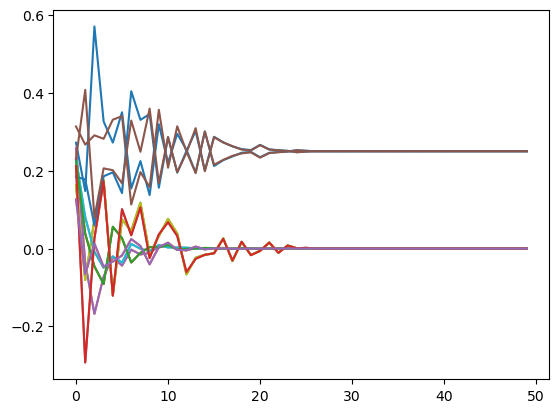

In [2]:
mat=rand_PSDM()
print('Initial matrix:')
print(mat)
mat, df = mean_over_unitars(mat,N=50, recording=True)
print('Final matrix:')
print(mat)
df.drop('Trace',axis=1).plot(legend=False)

Initial matrix:
[[ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0. ]]
Final matrix:
[[ 0.25 -0.    0.    0.  ]
 [-0.    0.25 -0.   -0.  ]
 [ 0.   -0.    0.25  0.  ]
 [ 0.   -0.    0.    0.25]]


<Axes: >

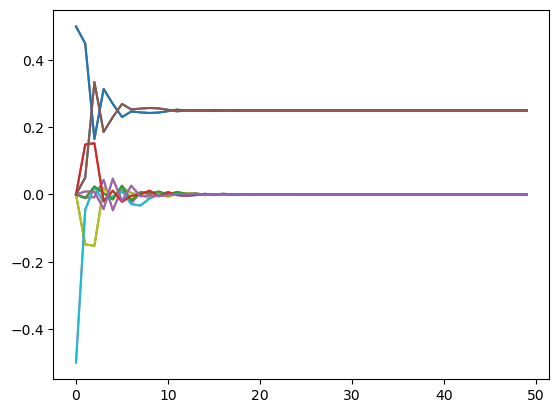

In [4]:
mat=np.matrix([[0,0,0,0],[0,0.5,-0.5,0],[0,-0.5,0.5,0],[0,0,0,0]])
print('Initial matrix:')
print(mat)
mat, df = mean_over_unitars(mat,N=50, recording=True)
print('Final matrix:')
print(mat)
df.drop('Trace',axis=1).plot(legend=False)

Initial matrix:
[[0.125   0.      0.      0.     ]
 [0.      0.5     0.21651 0.     ]
 [0.      0.21651 0.25    0.     ]
 [0.      0.      0.      0.125  ]]
Final matrix:
[[ 0.25 -0.    0.   -0.  ]
 [-0.    0.25  0.   -0.  ]
 [ 0.    0.    0.25 -0.  ]
 [-0.   -0.   -0.    0.25]]


<Axes: >

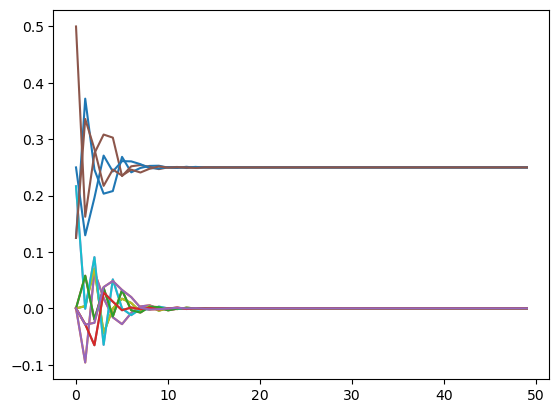

In [21]:
mat=pio6v05.matrix
print('Initial matrix:')
print(mat)
mat, df = mean_over_unitars(mat,N=50, recording=True)
print('Final matrix:')
print(mat)
df.drop('Trace',axis=1).plot(legend=False)

Initial matrix:
[[0.29629 0.1914  0.25994 0.24748]
 [0.1914  0.20671 0.19541 0.19245]
 [0.25994 0.19541 0.2699  0.24012]
 [0.24748 0.19245 0.24012 0.2271 ]]
Final matrix:
[[ 0.25319 -0.00165 -0.00309 -0.00047]
 [-0.00165  0.2467  -0.00196  0.00227]
 [-0.00309 -0.00196  0.24976 -0.00136]
 [-0.00047  0.00227 -0.00136  0.25036]]


<Axes: >

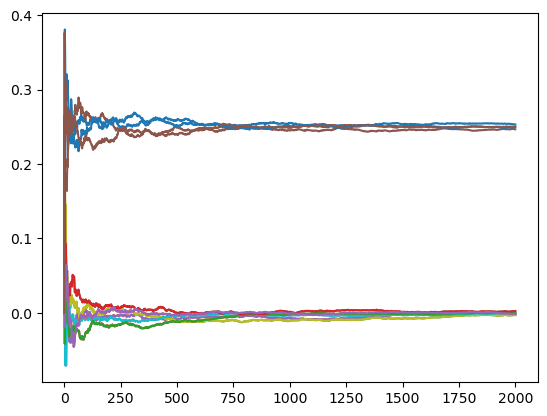

In [5]:
mat=rand_PSDM()
print('Initial matrix:')
print(mat)
mat, df= mean_over_unitars2(mat,N=2000, recording=True)
print('Final matrix:')
print(mat)
df.plot(legend=False)


### Optimizing for fidelity

Quantum fidelity 0.9330, 
 optimal quantum fidelity: 0.9329, 
 geometrical classical fidelity 0.8534, 
 statistical classical fidelity 0.8876, 
 another classical fidelity 0.9532


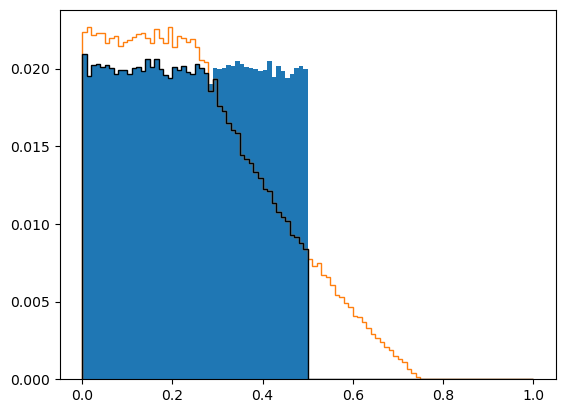

In [3]:
compare_fid(pio4, pio6, show_fidelity=True)

Quantum fidelity 0.4647, 
 optimal quantum fidelity: 0.4828, 
 geometrical classical fidelity 0.6537, 
 statistical classical fidelity 0.7559, 
 another classical fidelity 0.8310


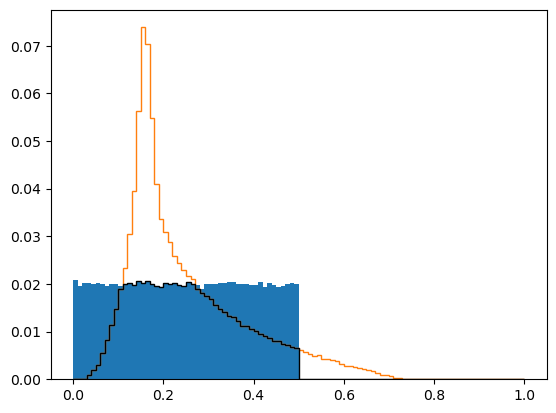

In [4]:

compare_fid(pio4, rand_state, show_fidelity=True)


Quantum fidelity 0.9891, 
 optimal quantum fidelity: 0.9891, 
 geometrical classical fidelity 0.9355, 
 statistical classical fidelity 0.9795, 
 another classical fidelity 0.9895


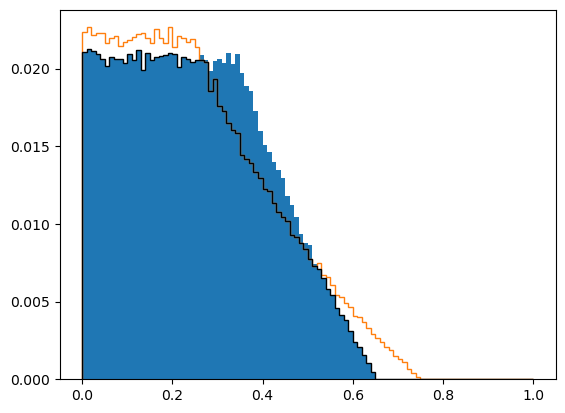

In [5]:
compare_fid(pio5, pio6, show_fidelity=True)

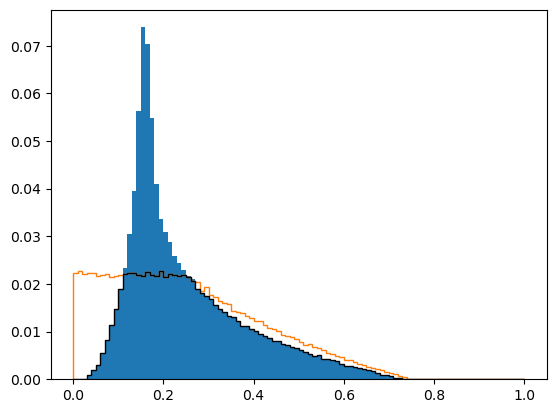

In [2]:
double_plot(rand_state, pio6, show_fidelity=True)

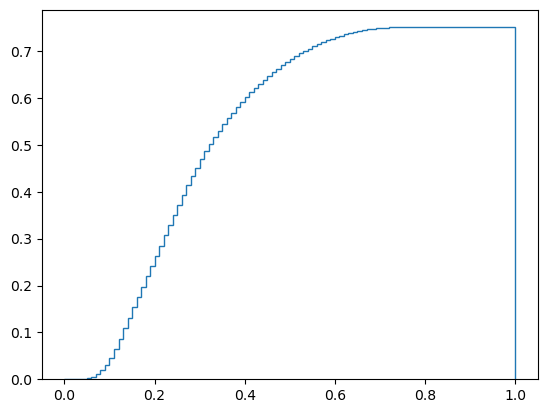

In [4]:
plt.stairs(classical_fidelity2(rand_state, pio6)[2], pio6.bins()['bins'])

Quantum fidelity 0.4174, 
 optimal quantum fidelity: 0.6167, 
 geometrical classical fidelity 0.7509, 
 statistical classical fidelity 0.8394, 
 another classical fidelity 0.8121


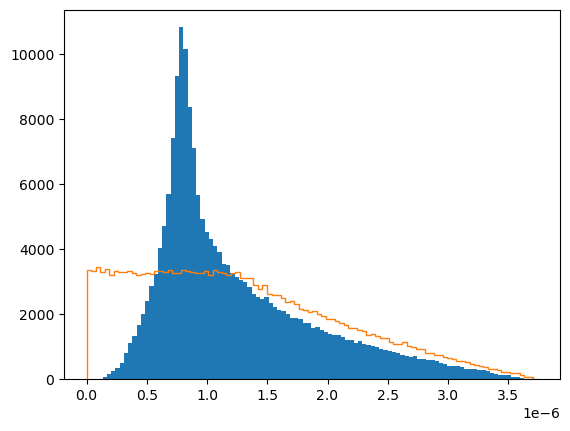

In [7]:
compare_fid(rand_state, pio6)

In [6]:
def expexted(dmA):
    probs = dmA.bins()['bins']
    probs = probs + probs[1]/2     #setting each value to be in the middle of intervals
    arrA = dmA.bins()['counts']/(len(probs)-1)
    A1 = (probs[:-1] * arrA).sum()
    return A1

### Averaging observations for different matrix distributions

In [32]:
mat = np.zeros((4,4), complex)
for par in parameters[:100000]:
    uA=unitary_mat2(par[0])
    uB=unitary_mat2(par[1])
    uAB = tens_prod2d(uA,uB)
    mat += uAB.getH()@np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,1]])@uAB

mat/100000
    

array([[ 0.24999+0.j     , -0.0013 +0.00089j, -0.00073-0.00087j,
         0.00044-0.00068j],
       [-0.0013 -0.00089j,  0.25004+0.j     ,  0.00004-0.00034j,
        -0.00076-0.00037j],
       [-0.00073+0.00087j,  0.00004+0.00034j,  0.25068+0.j     ,
        -0.00118+0.00055j],
       [ 0.00044+0.00068j, -0.00076+0.00037j, -0.00118-0.00055j,
         0.24929+0.j     ]])

In [9]:
def unitary_mat3(L=2):
    #mat=np.zeros((4,4))
    
    mat=np.random.normal(size=(L,L,2)).view(np.complex128).reshape(L,L,)
    mat2=mat.copy()
    for i in range(L):
            for j in range(i):
                mat2[i] -= mat2[j] * np.inner(np.conjugate(mat2[j]), mat[i]) / np.inner(np.conjugate(mat2[j]), mat2[j])
            #print(mat2[i], end=' ')
            mat2[i] /= np.sqrt(np.real(np.inner(np.conjugate(mat2[i]), mat2[i])))
            #print(mat2[i])
    return np.asmatrix(mat2)

In [12]:
matrices = []

for i in range(1000000):
    matrices.append([unitary_mat3(), unitary_mat3()])

np.save('matrices', matrices)

In [33]:
mat = np.matrix(np.zeros([4,4]), complex)
for mats in matrices[:100000]:
    uA = mats[0]
    uB = mats[1]
    uAB = tens_prod2d(uA, uB)
    mat+=uAB@np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,1]])@uAB.getH()/100000
    
mat

matrix([[ 0.25029+0.j     ,  0.00064+0.00053j, -0.00078-0.00047j,
          0.00001+0.00005j],
        [ 0.00064-0.00053j,  0.24957+0.j     , -0.0001 +0.00016j,
         -0.0001 -0.00057j],
        [-0.00078+0.00047j, -0.0001 -0.00016j,  0.24963-0.j     ,
          0.00019-0.00027j],
        [ 0.00001-0.00005j, -0.0001 +0.00057j,  0.00019+0.00027j,
          0.25052+0.j     ]])

Using Haar measure

In [11]:
import scipy as scp

def haar_measure(n=2):
    '''A Random matrix distributed with Haar measure'''
    z = (scp.randn(n,n) + 1j*scp.randn(n,n))/scp.sqrt(2.0)
    q,r = scp.linalg.qr(z)
    d = scp.diagonal(r)
    ph = d/scp.absolute(d)
    q = scp.multiply(q,ph,q)
    q = q / np.power(np.linalg.det(q), 1/n)
    return q


In [20]:
mat = np.zeros((2,2), dtype = complex)
for i in range(10000):
    m = haar_measure()
    mat+=m@np.array([[0,0],[0,1]])@np.transpose(np.conjugate(m))
mat/=10000
mat

C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:5: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  z = (scp.randn(n,n) + 1j*scp.randn(n,n))/scp.sqrt(2.0)
C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  z = (scp.randn(n,n) + 1j*scp.randn(n,n))/scp.sqrt(2.0)
C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:7: DeprecationWarning: scipy.diagonal is deprecated and will be removed in SciPy 2.0.0, use numpy.diagonal instead
  d = scp.diagonal(r)
C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:8: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
  ph = d/scp.absolute(d)
C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:9: DeprecationWarning: scipy.multiply is deprecated and will be 

array([[ 0.50074+0.j     , -0.0069 +0.00287j],
       [-0.0069 -0.00287j,  0.49926+0.j     ]])

### Optimizing by angle

Condition for zero derivative of fidelity w.r.t. $\alpha$:

$$\tan 2 \alpha = \frac{\bra {01} \rho \ket {01} + \bra {10} \rho \ket{01} } { \bra{10} \rho \ket{10} - \bra{01} \rho \ket{01}} = \frac{\rho_{12} + \rho_{21}}{\rho_{22} - \rho_{11}}$$

There are always two zeros in $[0, \pi]$ -  one maximum and one minimum.

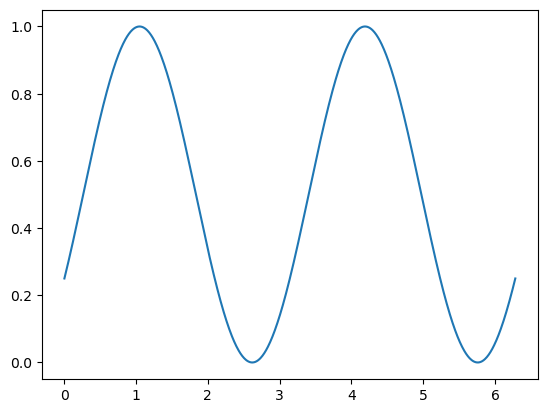

In [9]:
x = np.linspace(0, 2* pi, 1000)
y = []
a0=0
for angle in x:
    y.append(matrix_fidelity(pio3, density_matrix(rho2(a0+angle,1))))
plt.plot(x,y)

In [2]:
def find_angle(dm):
    rho=dm.matrix
    if(rho[2,2] == rho[1,1]):
        return pi/4
    val = (rho[1,2] + rho[2,1])/(rho[1,1]-rho[2,2])
    α = np.arctan(val)/2
    secondDerivative = -2*np.sin(2*α)*(rho[1,2] + rho[2,1]) + np.cos(2*α)*(rho[1,1]-rho[2,2])
    if(secondDerivative>0):
        α+=pi/2
    return α

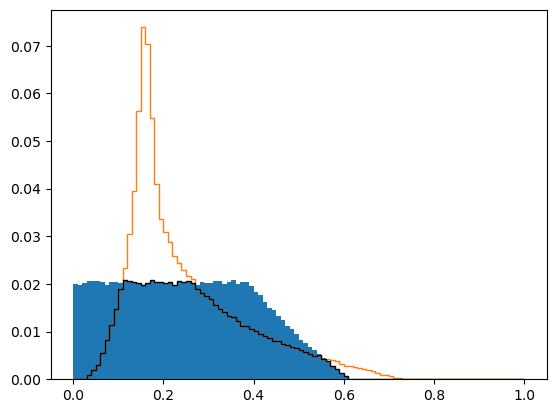

In [3]:
opt_random = density_matrix(rho2(find_angle(rand_state), 1))
opt_random.set(200_000)
double_plot(opt_random, rand_state, show_fidelity=True)

<class 'numpy.matrix'> <class 'numpy.matrix'>
Initial distance 0.8007830616673284
Initial quantum fidelity: 0.4697124224962422
Optimal visibility: 0.2929498966616562
Final quantum fidelity: 0.7363507860231091
<class 'numpy.matrix'> <class 'numpy.matrix'>
Final distance: 0.5160592558789322


c:\Users\Jan\anaconda3\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


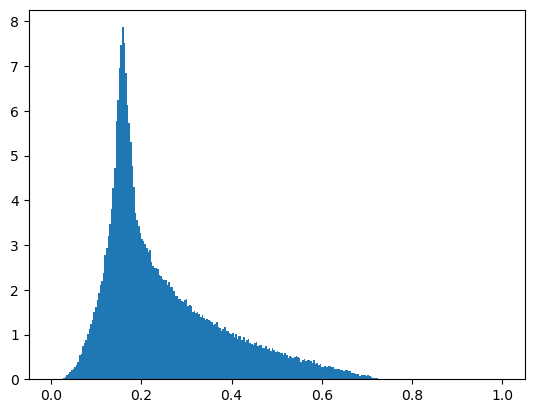

In [8]:
opt_matrix = vis_optimizer_dm(rand_state, density_matrix(rho2(find_angle(rand_state),1)),plot=True)

setting density_matrix data...


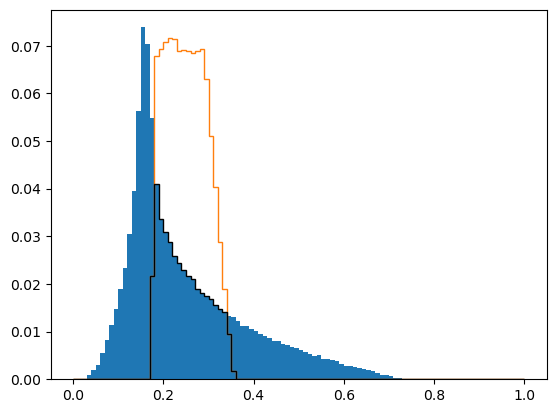

In [5]:
double_plot(rand_state, opt_matrix, show_fidelity=True)

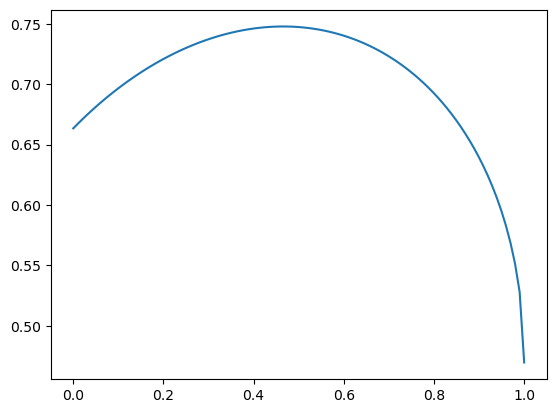

In [16]:
x = np.linspace(0,1, 100)
y = np.zeros(100)
for idx, vis in np.ndenumerate(x):
    y[idx]=matrix_fidelity(rand_state, density_matrix(rho2(find_angle(rand_state),vis)))
plt.plot(x,y)

In [21]:
opt_matrix2= density_matrix(rho2(find_angle(rand_state),x[y.argmax()]))
x[y.argmax()]

0.4646464646464647

setting density_matrix data...


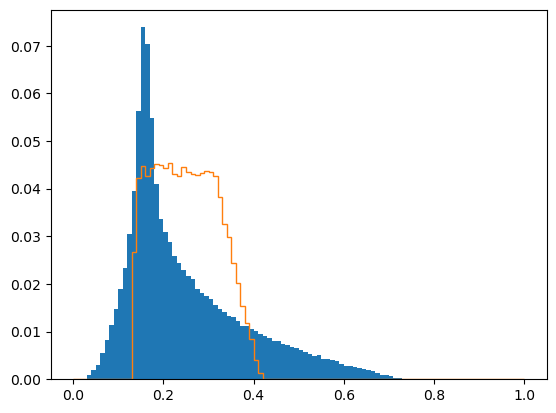

In [22]:
double_plot(rand_state, opt_matrix2)

Matrix fidelity 0.7478, 
 optimal matrix fidelity: 0.7917, 
 geometrical classical fidelity 0.6417, 
 statistical bin classical fidelity 0.6992, 
 statistical point classical fidelity 0.2300


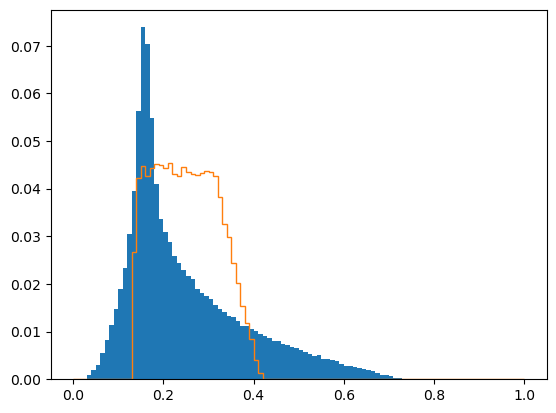

In [23]:
compare_fid(rand_state, opt_matrix2)

### Discrete angles

In [5]:
def optimal_matrix_fidelity(dmA, angle):
    from scipy.optimize import differential_evolution
    def f(params, matrixA, angle):
        matrixA = matrixA.matrix if type(matrixA) == density_matrix else matrixA
        matrixB = rho2(angle, 1)
        paramsA = params[:3]
        paramsB = params[3:]
        return -1*matrix_fidelity(rotate_matrix(matrixB, paramsA, paramsB), matrixA)
    bounds = [(0,2*pi), (0,2*pi), (0,2*pi), (0,2*pi), (0,2*pi), (0,2*pi)]
    res = differential_evolution(f, args=(dmA, angle,), bounds=bounds)
    return {'value': -res['fun'], 'parameters': [res['x'][:3].tolist(), res['x'][3:].tolist()]}

In [6]:
for angle in np.linspace(0, pi/2, 10):
    print(angle, optimal_matrix_fidelity(rand_state, angle))
    

0.0 {'value': 0.7341715029687742, 'parameters': [[3.9209218022207097, 1.8801882683346927, 1.864506559594092], [4.1124631631357245, 1.899934337387886, 5.035678122252619]]}
0.3490658503988659 {'value': 0.6843464993459409, 'parameters': [[2.3689821197063288, 5.230586822980301, 2.092903676939664], [0.9763217488728881, 5.141118937506203, 2.0461091674536926]]}
0.6981317007977318 {'value': 0.529858397733257, 'parameters': [[3.8840052785863417, 1.7521584503364238, 1.766181379764589], [4.097992840997419, 4.829239487558933, 1.7063511086099454]]}
1.0471975511965976 {'value': 0.6164961138118625, 'parameters': [[0.7790888671272449, 6.114072415085717, 2.94783594781681], [5.692335618383314, 6.139920370685011, 2.9342550071183986]]}
1.3962634015954636 {'value': 0.7251399852017539, 'parameters': [[0.7763276520235235, 1.8431928725214959, 5.0105196879704375], [0.6008638543066519, 4.972406386547176, 4.966877671807172]]}
1.7453292519943295 {'value': 0.7249195264052924, 'parameters': [[3.940851435355434, 0.2

### Optimizing for all parameters

Initial distance 0.3347016587147192
Initial matrix fidelity: 0.7343266019465731
Optimal visibility: 0.6457688025954307
Final matrix fidelity: 0.92938008276571
Final distance: 0.13385494489096011


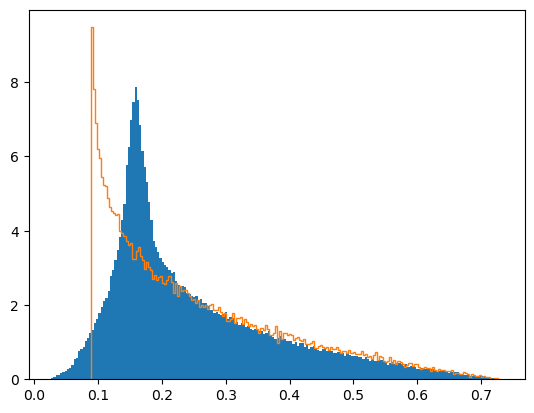

0.6457688025954307

In [3]:
ans = optimal_matrix_fidelity(rand_state)
angle = ans['angle']
opt_matrix = density_matrix(rho2(angle, 1))
opt_matrix2=density_matrix(rotate_matrix(opt_matrix, ans['parameters'][0],ans['parameters'][1]))
vis_optimizer_dm(rand_state, opt_matrix2, plot=True)

In [4]:
print(f'Classical fidelity 1: {classical_fidelity(opt_matrix2, rand_state)} \n classical fidelity 2: {classical_fidelity2(opt_matrix2, rand_state)[0]} \n classical fidelity 3: {classical_fidelity3(opt_matrix2, rand_state)}')

setting density_matrix data...
Classical fidelity 1: 0.6923559243752593 
 classical fidelity 2: 0.62490499999999 
 classical fidelity 3: 0.18542126515021948


setting density_matrix data...


{'distance': 0.1296789486999658,
 'angle': 1.5292786732238057,
 'visibility': 0.6469069776183887,
 'parameters': [array([3.9331 , 3.69967, 0.55808]),
  array([5.68686, 0.55808, 3.69967])]}

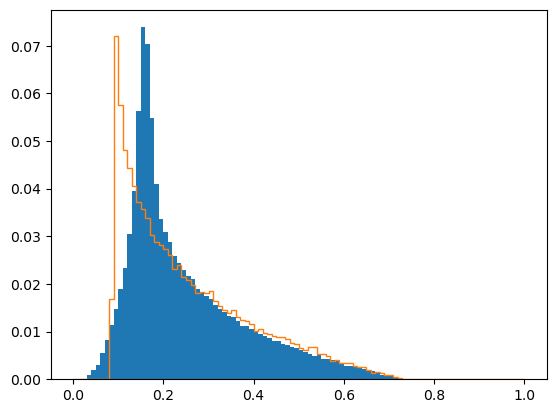

In [29]:
ansB = optimal_matrix_fidelity_vis(rand_state)
angleB = ansB['angle']
visB = ansB['visibility']
opt_matrixB = density_matrix(rho2(angleB, visB))
opt_matrix2B = density_matrix(rotate_matrix(opt_matrixB, ansB['parameters'][0], ansB['parameters'][1]))
double_plot(rand_state, opt_matrixB)
ansB

## Generating Data for ML

## Measures

In [18]:
correlation_matrix(pio4)

matrix([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0., -1.]])

In [39]:
angle = np.linspace(0, pi/2, 100)
vis = np.linspace(0,1,100)
conc = []
for an in angle:
    c=[]
    for v in vis:
        c.append(concurrence(density_matrix(rho2(an, v))))  
    conc.append(c)
    


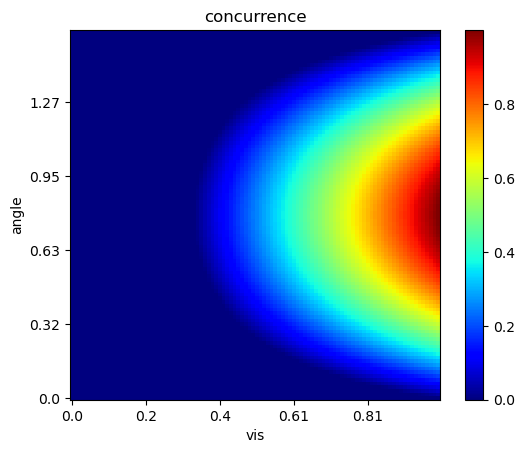

In [15]:
plt.imshow(conc, interpolation='none', cmap=plt.cm.jet, origin='lower')  
plt.colorbar()
plt.ylabel('angle')
plt.xlabel('vis')
plt.title('concurrence')
plt.yticks(range(0,len(angle),20), np.round(angle[::20], 2))
plt.xticks(range(0,len(vis),20), np.round(vis[::20], 2))
plt.show()